In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

In [2]:
dataset = pd.read_csv("Social_Network_Ads (2).csv")

In [3]:
y = dataset.iloc[:,-1]
x = dataset.iloc[:,:-1]


In [4]:
from sklearn.model_selection import train_test_split
X, X_test, Y, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X_test = sc.fit_transform(X_test)

In [7]:
from sklearn import svm
classifier= svm.SVC()
classifier.fit(X, Y)

SVC()

In [8]:
y_pred = classifier.predict(X_test)

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred)
print(cm)
accuracy_score(Y_test, y_pred)

[[40  8]
 [ 3 29]]


0.8625

In [10]:
y_pred = classifier.predict([[30,87000]])
y_pred

array([1])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


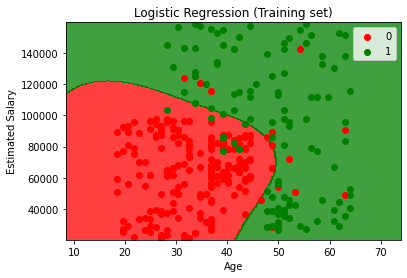

In [11]:
from matplotlib.colors import ListedColormap
X_set, y_set =sc.inverse_transform(X), Y
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()